# Best pair search

Realizando 20 rodadas de classificação com `SVC` no dataset `chb01dwt` para determinar com qual canal se obtém o melhor par para o canal 9 os melhores resultados.

## Importando biblioteca

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Carregando dados

In [2]:
chb_dwt_df = pd.read_csv('./chb01dwt.csv')

target_dwt_s = chb_dwt_df.pop('target')

random_seeds = np.random.randint(0, 9000, 20)

random_seeds

array([2843, 8237, 8303, 3185,  532, 2699, 3002, 5788, 6786, 8951, 5145,
       3271, 8143,  468,  243, 1739, 2338, 1310, 1644, 6400])

## Realizando classificação com pares

Utilizando apenas pares entre o canal 16, que se saiu melhor no teste anterior, e os demais canais.

In [3]:
range_without_9 = [par for par in range(18) if par != 9]

channels_df = pd.DataFrame(columns=[f'{i}-9' for i in range_without_9])

for pair in range_without_9:

    columns_channel_pair =[column for column in chb_dwt_df.columns if (f'{pair}' in column.split('-'))]
    columns_channel_nine = [column for column in chb_dwt_df.columns if (f'9' in column.split('-'))]

    pair_of_columns = columns_channel_pair + columns_channel_nine

    # X recebe apenas as colunas relacionadas aos pares de canais da iteração
    X = chb_dwt_df[pair_of_columns].values
    y = target_dwt_s.values

    channel_acc = []
    for seed in random_seeds:
        # Separando dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando classificador
        classifier = KNeighborsClassifier().fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    channels_df[f'{pair}-9'] = channel_acc

channels_df

,0-9,1-9,2-9,3-9,4-9,5-9,6-9,7-9,8-9,10-9,11-9,12-9,13-9,14-9,15-9,16-9,17-9
0,0.938462,0.969231,0.953846,0.976923,0.923077,0.976923,0.961538,0.961538,0.930769,0.961538,0.969231,0.938462,0.953846,0.938462,0.953846,0.961538,0.969231
1,0.930769,0.930769,0.930769,0.930769,0.907692,0.946154,0.930769,0.938462,0.923077,0.938462,0.946154,0.907692,0.953846,0.938462,0.946154,0.961538,0.953846
2,0.923077,0.961538,0.938462,0.953846,0.930769,0.953846,0.961538,0.946154,0.923077,0.961538,0.938462,0.923077,0.938462,0.923077,0.969231,0.946154,0.953846
3,0.915385,0.915385,0.923077,0.915385,0.900000,0.930769,0.930769,0.907692,0.915385,0.923077,0.923077,0.900000,0.907692,0.876923,0.923077,0.907692,0.915385
4,0.961538,0.961538,0.969231,0.976923,0.930769,0.969231,0.961538,0.961538,0.946154,0.976923,0.961538,0.961538,0.961538,0.969231,0.961538,0.946154,0.969231
5,0.900000,0.923077,0.946154,0.969231,0.907692,0.946154,0.915385,0.946154,0.884615,0.938462,0.938462,0.900000,0.930769,0.938462,0.953846,0.953846,0.938462
6,0.938462,0.953846,0.938462,0.938462,0.930769,0.953846,0.923077,0.953846,0.938462,0.976923,0.946154,0.946154,0.961538,0.938462,0.946154,0.953846,0.938462
7,0.923077,0.946154,0.961538,0.953846,0.923077,0.961538,0.938462,0.938462,0.953846,0.953846,0.930769,0.923077,0.930769,0.946154,0.946154,0.946154,0.946154
8,0.946154,0.961538,0.938462,0.946154,0.915385,0.930769,0.930769,0.930769,0.923077,0.953846,0.953846,0.907692,0.946154,0.946154,0.923077,0.953846,0.938462
9,0.907692,0.923077,0.907692,0.953846,0.892308,0.946154,0.915385,0.923077,0.923077,0.946154,0.930769,0.930769,0.915385,0.900000,0.938462,0.946154,0.946154


,count,mean,std,min,25%,50%,75%,max
10-9,20.0,0.952308,0.014467,0.923077,0.946154,0.953846,0.961538,0.976923
3-9,20.0,0.951923,0.015760,0.915385,0.944231,0.953846,0.963462,0.976923
5-9,20.0,0.950769,0.017000,0.923077,0.938462,0.946154,0.961538,0.984615
17-9,20.0,0.946538,0.019247,0.915385,0.936538,0.946154,0.955769,0.984615
15-9,20.0,0.944615,0.014250,0.923077,0.936538,0.946154,0.955769,0.969231
1-9,20.0,0.944231,0.017268,0.915385,0.930769,0.946154,0.961538,0.969231
16-9,20.0,0.941538,0.016630,0.907692,0.930769,0.946154,0.953846,0.961538
2-9,20.0,0.940385,0.016150,0.907692,0.930769,0.938462,0.953846,0.969231
13-9,20.0,0.940000,0.018776,0.907692,0.930769,0.938462,0.953846,0.976923
11-9,20.0,0.937692,0.018826,0.884615,0.930769,0.938462,0.946154,0.969231


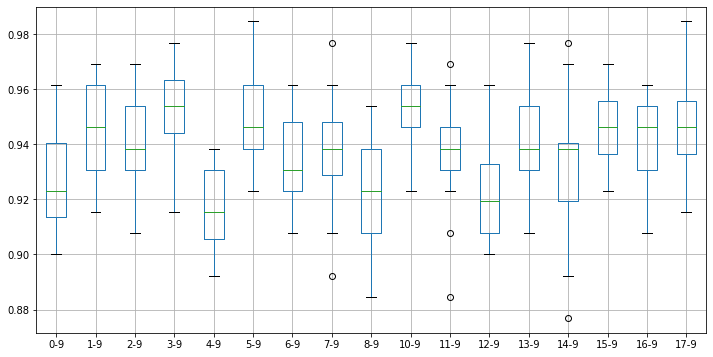

In [4]:
channels_df.boxplot(figsize=(12, 6))
channels_df.describe().transpose().sort_values(by='mean', ascending=False)